Se han desarrollado varios modelos de datos para cumplir con los requisitos, mineria de datos y probabilidad para predecir resultados.

cada modelo se construye en funcion de los predictores.

De manera básica existen dos tipos de modelado predictivo:

paramétrico: por ejemolo la recta, se basa en la pendiente y el intercepto.
no paramétrico: es más sutil, captura información propia de los datos.


La métrica a utilizar en la evaluación del modelo es RMSE

In [15]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  

In [34]:
data = pd.read_csv('bike_train_csv.csv',encoding='UTF-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11999 non-null  int64  
 1   dteday      11999 non-null  object 
 2   season      11999 non-null  int64  
 3   yr          11999 non-null  int64  
 4   mnth        11999 non-null  int64  
 5   hr          11999 non-null  int64  
 6   holiday     11999 non-null  int64  
 7   weekday     11999 non-null  int64  
 8   workingday  11999 non-null  int64  
 9   weathersit  11999 non-null  int64  
 10  temp        11999 non-null  float64
 11  atemp       11999 non-null  float64
 12  hum         11999 non-null  float64
 13  windspeed   11999 non-null  float64
 14  casual      11999 non-null  int64  
 15  registered  11999 non-null  int64  
 16  cnt         11999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

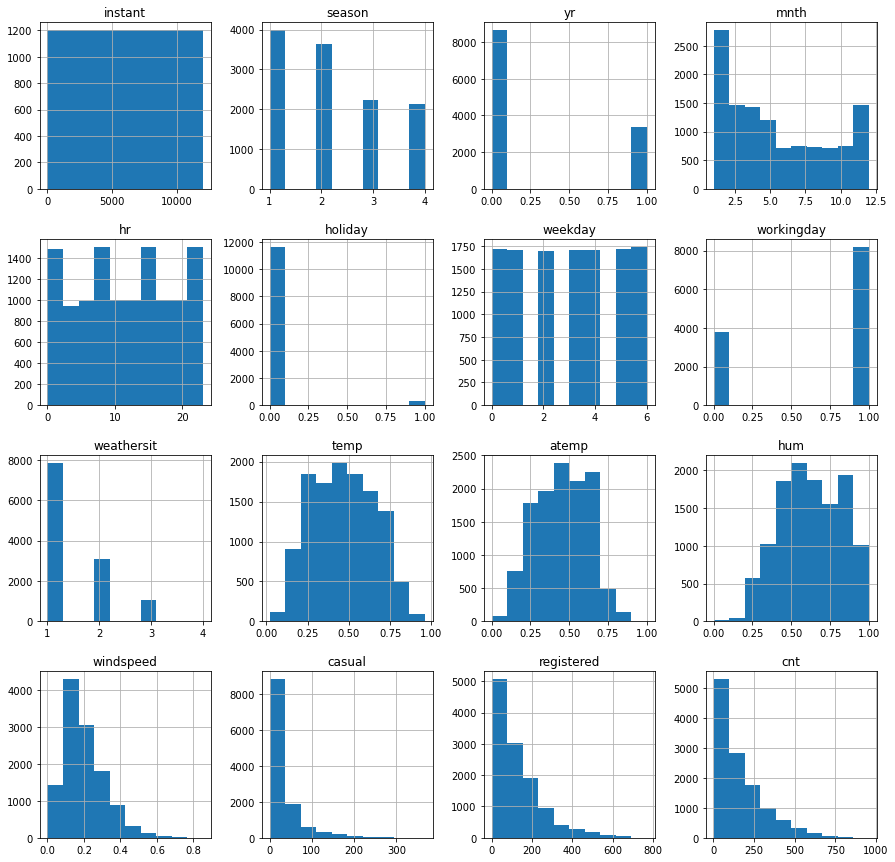

In [5]:
data.hist(figsize=(15,15))


In [10]:
profile = data.profile_report(title='test')

In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
data.head()

instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1   0        0        6           0   
1        2  1/1/2011       1   0     1   1        0        6           0   
2        3  1/1/2011       1   0     1   2        0        6           0   
3        4  1/1/2011       1   0     1   3        0        6           0   
4        5  1/1/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [36]:
data['TDate'] = pd.to_datetime(data['dteday'])
data['TDate'] +=  pd.to_timedelta(data['hr'], unit='h')
data.set_index('TDate', inplace=True)
data = data.drop(['instant','dteday','yr','mnth','holiday','weekday','workingday','weathersit','windspeed'],axis=1)

In [37]:
data.head(30)

season  hr  temp   atemp   hum  casual  registered  cnt
TDate                                                                       
2011-01-01 00:00:00       1   0  0.24  0.2879  0.81       3          13   16
2011-01-01 01:00:00       1   1  0.22  0.2727  0.80       8          32   40
2011-01-01 02:00:00       1   2  0.22  0.2727  0.80       5          27   32
2011-01-01 03:00:00       1   3  0.24  0.2879  0.75       3          10   13
2011-01-01 04:00:00       1   4  0.24  0.2879  0.75       0           1    1
2011-01-01 05:00:00       1   5  0.24  0.2576  0.75       0           1    1
2011-01-01 06:00:00       1   6  0.22  0.2727  0.80       2           0    2
2011-01-01 07:00:00       1   7  0.20  0.2576  0.86       1           2    3
2011-01-01 08:00:00       1   8  0.24  0.2879  0.75       1           7    8
2011-01-01 09:00:00       1   9  0.32  0.3485  0.76       8           6   14
2011-01-01 10:00:00       1  10  0.38  0.3939  0.76      12          24   36
2011-01-01 11:00:00       1  11  0.36  0.3333  0.81      26          30   56
2011-01-01 12:00:00       1  12  0.42  0.4242  0.77      29          55   84
2011-01-01 13:00:00       1  13  0.46  0.4545  0.72      47          47   94
2011-01-01 14:00:00       1  14  0.46  0.4545  0.72      35          71  106
2011-01-01 15:00:00       1  15  0.44  0.4394  0.77      40          70  110
2011-01-01 16:00:00       1  16  0.42  0.4242  0.82      41          52   93
2011-01-01 17:00:00       1  17  0.44  0.4394  0.82      15          52   67
2011-01-01 18:00:00       1  18  0.42  0.4242  0.88       9          26   35
2011-01-01 19:00:00       1  19  0.42  0.4242  0.88       6          31   37
2011-01-01 20:00:00       1  20  0.40  0.4091  0.87      11          25   36
2011-01-01 21:00:00       1  21  0.40  0.4091  0.87       3          31   34
2011-01-01 22:00:00       1  22  0.40  0.4091  0.94      11          17   28
2011-01-01 23:00:00       1  23  0.46  0.4545  0.88      15          24   39
2011-01-02 00:00:00       1   0  0.46  0.4545  0.88       4          13   17
2011-01-02 01:00:00       1   1  0.44  0.4394  0.94       1          16   17
2011-01-02 02:00:00       1   2  0.42  0.4242  1.00       1           8    9
2011-01-02 03:00:00       1   3  0.46  0.4545  0.94       2           4    6
2011-01-02 04:00:00       1   4  0.46  0.4545  0.94       2           1    3
2011-01-02 06:00:00       1   6  0.42  0.4242  0.77       0           2    2

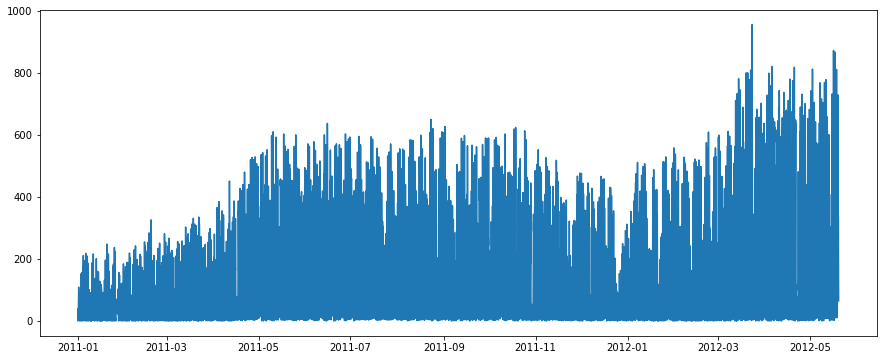

In [13]:
plt.figure(figsize=(15,6))
plt.plot(data['TDate'], data['cnt'])

In [38]:
#se separa la columna con las predicciones
X = np.array(data.drop(['cnt'],1))
y = np.array(data['cnt'])

#se separan los datos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


C:\Users\liu\AppData\Local\Temp\ipykernel_8028\3366130669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['cnt'],1))


In [39]:
#regresion Logística
logreg = LogisticRegression(solver='lbfgs', max_iter=3000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Presición Regresión Logística:')
print(logreg.score(X_train,y_train))

Presición Regresión Logística:
0.17126784040004167


c:\Users\liu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
